# Overfitting Demo

# Generate Random Data
We are going to randomly create some points and add in a little bit of noise.

In [4]:
import numpy as np
n = 30
min_val = -5.0
max_val = 5.0
range_val = max_val - min_val

#This will generate an array of values from min to max
x_data = min_val + range_val * np.random.rand(n, 1) 

# Use a quadratic formula to compute each of the y values plus a bit of noise
y_data = -3 + 2*x_data +x_data**2 + 4*np.random.rand(n, 1)

# The following will do a log function
#y_data = 3 + np.log(x_data - min_val) + 0.2*np.random.rand(n, 1) 

# The following will do a sin function
#y_data = 2 + np.sin(x_data) + 0.2*np.random.rand(n, 1) 

# The following will do an exponential function
#y_data = 2 + np.exp(x_data) + 0.2*np.random.rand(n, 1) 

# The following will do an absolute value function
#y_data = -2 + np.abs(x_data) + 0.3*np.random.rand(n, 1)

# The following will do a line with a modest bit of noise
#y_data = -2 + 3* x_data + 1.5*np.random.rand(n, 1)


    
print(x_data)
print(y_data)

[[-3.63567348]
 [-0.60479676]
 [ 1.32468971]
 [ 1.19716185]
 [ 1.44917985]
 [-2.25175957]
 [ 1.12418233]
 [ 4.15631162]
 [ 0.30076456]
 [ 3.67043685]
 [-4.23540812]
 [-3.39095345]
 [ 0.36735304]
 [-1.33455762]
 [-0.70248031]
 [-1.9185944 ]
 [ 3.70510868]
 [ 2.54210059]
 [-4.18077323]
 [-4.89220474]
 [-3.8372757 ]
 [ 4.78121914]
 [ 4.23174222]
 [ 3.7286207 ]
 [ 2.14478734]
 [ 3.24278544]
 [ 3.57468951]
 [-0.16689699]
 [ 2.13836201]
 [ 0.04468849]]
[[ 5.75643671]
 [-1.77364442]
 [ 3.19346585]
 [ 0.88425436]
 [ 2.84291072]
 [-0.57993298]
 [ 1.90820425]
 [23.32114328]
 [-0.3103225 ]
 [19.06039751]
 [ 7.31714276]
 [ 4.55874473]
 [ 0.75289956]
 [-1.25252818]
 [-0.82007066]
 [-2.2544188 ]
 [18.9464816 ]
 [ 9.09865358]
 [ 9.33940898]
 [14.81003251]
 [ 4.89216766]
 [29.60894358]
 [24.60408744]
 [20.71462469]
 [ 6.44618373]
 [16.4222983 ]
 [17.90407456]
 [ 0.32486   ]
 [ 8.46622648]
 [-2.7330146 ]]


## Quick Look at the Data
We will use pyplot from matplotlib

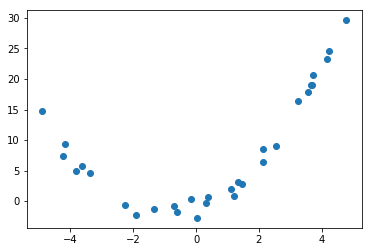

In [5]:
import matplotlib.pyplot as plt
plt.scatter(x_data, y_data)
plt.show()

## Try fitting a Line (Linear Regression)

In [6]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
linear_model.fit(x_data, y_data)

intercept = linear_model.intercept_[0]
slope = linear_model.coef_[0][0]
print(intercept, slope)

7.28663391009823 1.817469137977172


## Plot the line and the data

0.1


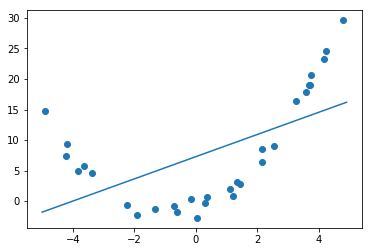

In [7]:
# Will use a list comprehension to create the curve points
number_points = 100
delta = (max_val - min_val)/number_points
print(delta)
x_curve = [ i*delta + min_val for i in range(number_points) ]
y_curve = [ intercept + slope*x for x in x_curve]

plt.scatter(x_data, y_data)
plt.plot(x_curve, y_curve)
plt.show()


## Try fitting with a quadratic

In [8]:
from sklearn.preprocessing import PolynomialFeatures
create_poly_terms = PolynomialFeatures(degree=2, include_bias=False)
x_poly_terms = create_poly_terms.fit_transform(x_data)

quad_model = LinearRegression()
quad_model.fit(x_poly_terms, y_data)

intercept = quad_model.intercept_[0]
coefs = quad_model.coef_[0]
print(intercept, coefs)

-1.1611292412107446 [1.83557729 0.99270591]


0.1


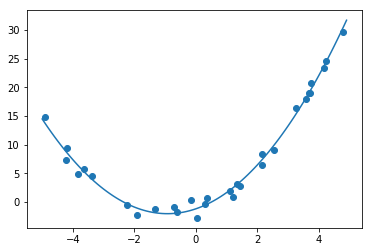

In [9]:
number_points = 100
delta = (max_val - min_val)/number_points
print(delta)
x_curve = [ i*delta + min_val for i in range(number_points) ]
y_curve = [ intercept + coefs[0]*x + coefs[1]*x**2 for x in x_curve]

plt.scatter(x_data, y_data)
plt.plot(x_curve, y_curve)
plt.show()

## Try Fitting with a degree K polynomial

In [14]:
K = 50

create_poly_terms = PolynomialFeatures(degree=K, include_bias=False)
x_poly_terms = create_poly_terms.fit_transform(x_data)

poly_model = LinearRegression()
poly_model.fit(x_poly_terms, y_data)

intercept = poly_model.intercept_[0]
coefs = poly_model.coef_[0]
print(intercept, coefs)

2.318788824979084 [-4.52123003e-23  8.86205445e-24 -2.81100497e-26 -2.31915879e-28
 -2.09141098e-28 -2.03660092e-25  4.25669557e-29 -3.13034801e-26
 -5.59852852e-27  1.04521859e-25  4.86298602e-28 -2.15792496e-27
 -4.71256674e-28 -5.30844376e-28 -5.50594188e-28 -5.84682460e-28
 -3.86220340e-28 -7.74737302e-28 -8.47821459e-28 -9.24857387e-28
 -9.85722723e-28 -1.06145257e-27 -8.89482543e-28 -8.68962097e-28
  2.00668688e-27  2.10927651e-27  3.44169494e-26  3.94932324e-26
  3.72376577e-25  3.44668859e-25  3.58722689e-24  2.93591504e-24
  3.23675627e-23  2.30752558e-23  2.63936573e-22  1.62053578e-22
  1.85095454e-21  9.63791262e-22  1.01040390e-20  4.36433297e-21
  3.26574009e-20  1.12919789e-20 -7.77520558e-21 -2.69147699e-21
  6.68313346e-22  2.29896314e-22 -2.51341256e-23 -8.57334635e-24
  3.50343088e-25  1.18335799e-25]


0.01


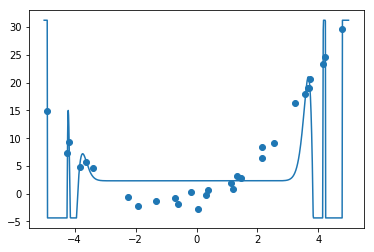

In [15]:
def poly_eval(intercept, coefs, x, y_min, y_max):
    value = intercept
    x_power = x
    for coef in coefs:
        term = coef * x_power
        x_power *= x
        value += term
    # Clip values 
    if value < y_min: return y_min
    if value > y_max: return y_max
    return value

plt.scatter(x_data, y_data)
# Get the bounds from the scatter data
[y_min, y_max] = plt.gca().get_ylim()


number_points = 1000
delta = (max_val - min_val)/number_points
print(delta)
x_curve = [ i*delta + min_val for i in range(number_points) ]
y_curve = [ poly_eval(intercept, coefs, x, y_min, y_max) for x in x_curve]


plt.plot(x_curve, y_curve)


plt.show()

## _Notes_
If the max degree of the polynomial is K, then the number of paramters is K+1.  As the number of random data points gets closer and closer to K, the polynomial does a better job of fitting the data by virtue of going through all the points.  Unfortunately, this also causes the function to have wild swings.  This is clearly not a good fit for the data.